In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/IITH.csv')
df

,Latitude,Longitude,Land Surface Temperature,Land Cover Type,Population Density,Albedo,Green Cover Percentage,Relative Humidity,Wind Speed,Surface Material,...,Building Height,Road Density,Proximity to Water Body,Urban Vegetation Index,Heat Stress Index,Carbon Emission Levels,Cooling Measures Present,Zone,Assigned Zone,Distance from Previous Point
0,19.059484,72.844772,37.3,Urban,48953,0.19,19,90,4.5,Concrete,...,21,4.1,4484,0.84,41.8,475.37,Water Features,Central Mumbai,Bandra,0.000000
1,19.126290,72.837609,38.6,Urban,31027,0.13,86,90,3.0,Water,...,37,8.4,1612,0.59,44.6,409.18,Water Features,Central Mumbai,Andheri,7433.175893
2,19.055276,72.830109,32.2,Water,16701,0.26,0,77,3.6,Soil,...,0,0.0,74,0.00,36.3,0.00,Rooftop Garden,Eastern Suburbs,Bandra,7900.186684
3,19.059167,72.822593,40.4,Urban,15125,0.11,38,63,1.0,Soil,...,4,12.9,300,0.52,45.7,467.03,NaN,Western Suburbs,Bandra,900.720447
4,19.061735,72.842434,37.8,Urban,12860,0.13,65,78,2.1,Water,...,38,11.4,1620,0.87,43.5,486.55,Rooftop Garden,Western Suburbs,Bandra,2107.583904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,18.909991,72.808059,26.4,Urban,4853,0.18,48,63,2.4,Asphalt,...,45,13.0,4364,0.44,30.3,431.25,Reflective Paint,Central Mumbai,Colaba,17229.364820
396,19.216184,72.999539,41.1,Urban,1703,0.30,2,62,4.1,Water,...,10,6.6,259,0.61,43.2,536.74,Water Features,Central Mumbai,Thane,39432.634760
397,18.920409,72.813917,39.0,Urban,44133,0.26,52,88,2.7,Soil,...,28,6.8,2377,0.66,45.1,208.05,NaN,Navi Mumbai,Colaba,38126.018700
398,19.214138,72.948720,35.9,Bare Soil,5374,0.28,72,83,2.1,Grass,...,0,0.0,2700,0.84,42.1,0.00,Water Features,Western Suburbs,Thane,35474.420210


In [ ]:
print(df.columns)

Index(['Latitude', 'Longitude', 'Land Surface Temperature', 'Land Cover Type',
       'Population Density', 'Albedo', 'Green Cover Percentage',
       'Relative Humidity', 'Wind Speed', 'Surface Material',
       'Solar Radiation', 'Nighttime Surface Temperature', 'Building Height',
       'Road Density', 'Proximity to Water Body', 'Urban Vegetation Index',
       'Heat Stress Index', 'Carbon Emission Levels',
       'Cooling Measures Present', 'Zone', 'Assigned Zone',
       'Distance from Previous Point'],
      dtype='object')


In [ ]:
import folium
from folium.plugins import HeatMap

# Prepare heatmap data
heatmap_data = df[["Latitude", "Longitude", "Land Surface Temperature"]].values

# Create a folium map
mumbai_map = folium.Map(location=[19.0760, 72.8777], zoom_start=12)

# Add heatmap layer
HeatMap(heatmap_data, radius=10).add_to(mumbai_map)

# Save and display map
mumbai_map.save("mumbai_heatmap.html")
mumbai_map


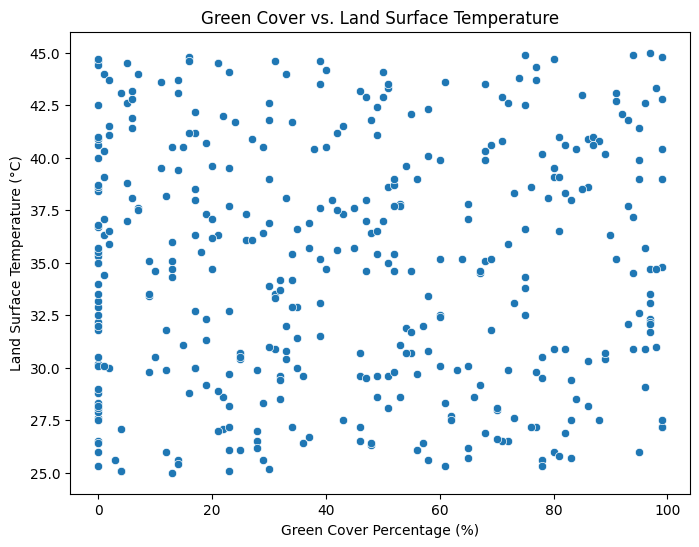

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Green Cover Percentage", y="Land Surface Temperature")
plt.title("Green Cover vs. Land Surface Temperature")
plt.xlabel("Green Cover Percentage (%)")
plt.ylabel("Land Surface Temperature (°C)")
plt.show()


In [ ]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Land Surface Temperature,0
Land Cover Type,0
Population Density,0
Albedo,0
Green Cover Percentage,0
Relative Humidity,0
Wind Speed,0
Surface Material,0


<Axes: >

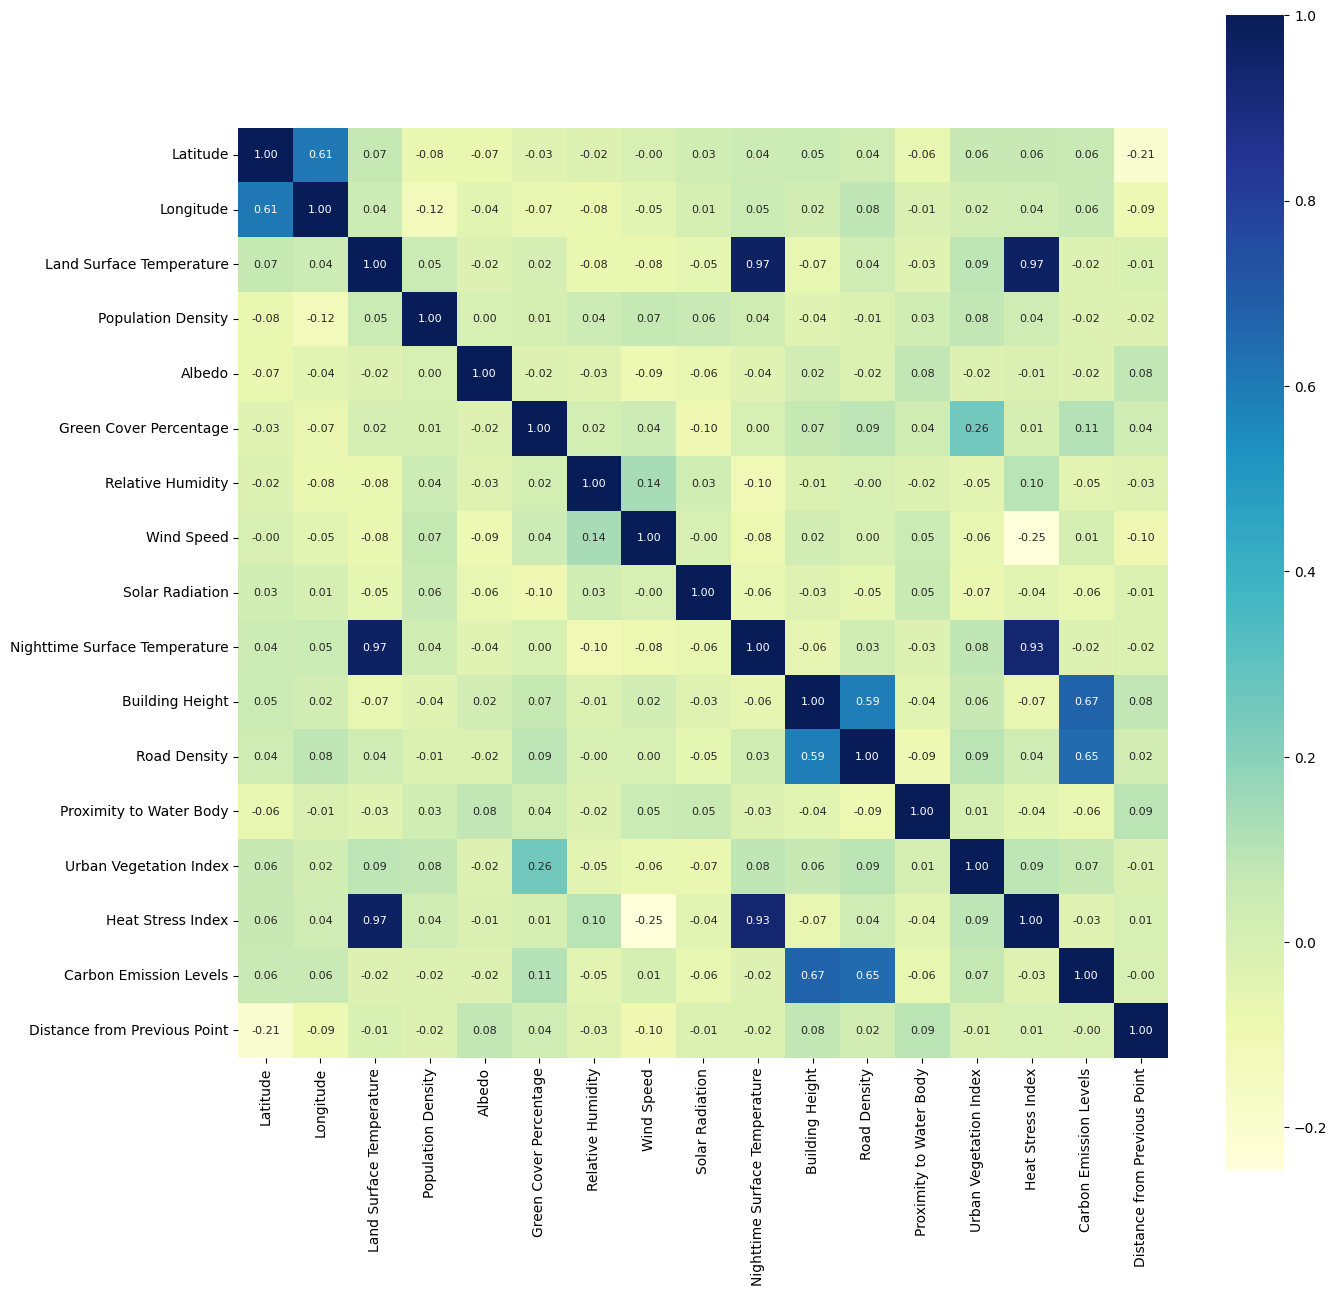

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data=df[['Latitude','Longitude','Land Surface Temperature','Population Density','Albedo','Green Cover Percentage','Relative Humidity','Wind Speed','Solar Radiation','Nighttime Surface Temperature','Building Height','Road Density','Proximity to Water Body','Urban Vegetation Index','Heat Stress Index','Carbon Emission Levels','Distance from Previous Point']]
correlation=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,square=2,fmt='.2f',annot=True,annot_kws={'size':8},cmap="YlGnBu")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
X=df[['Latitude','Longitude','Population Density','Albedo','Green Cover Percentage','Relative Humidity','Wind Speed','Solar Radiation','Nighttime Surface Temperature','Building Height','Road Density','Proximity to Water Body','Urban Vegetation Index','Heat Stress Index','Carbon Emission Levels','Distance from Previous Point']]
Y=df['Land Surface Temperature']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.5158245029548804e-14
Mean Squared Error (MSE): 3.7381488762073013e-28
Root Mean Squared Error (RMSE): 1.9334293046830808e-14
R-squared (R2): 1.0


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
Y_pred_ridge = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(Y_test, Y_pred_ridge)
ridge_mse = mean_squared_error(Y_test, Y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_test, Y_pred_ridge)

print("Ridge Regression Results:")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("R²:", ridge_r2)



Ridge Regression Results:
MAE: 0.00491112732037949
MSE: 3.501763407926037e-05
RMSE: 0.005917569947137116
R²: 0.9999989493038294


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                          Feature   Coefficient
13              Heat Stress Index  9.963723e-01
6                      Wind Speed  9.937470e-01
0                        Latitude  5.246727e-03
8   Nighttime Surface Temperature  3.407315e-03
3                          Albedo  1.102848e-03
10                   Road Density  2.666296e-05
4          Green Cover Percentage  7.415795e-06
7                 Solar Radiation  9.152238e-07
9                 Building Height  2.209226e-07
2              Population Density  2.601465e-08
15   Distance from Previous Point  1.660948e-08
11        Proximity to Water Body -3.016967e-08
14         Carbon Emission Levels -3.593365e-07
12         Urban Vegetation Index -2.773073e-04
1                       Longitude -3.941911e-03
5               Relative Humidity -9.956568e-02


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge_model, X_train, Y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())


Cross-validated R² scores: [0.99999798 0.99999836 0.99999873 0.99999761 0.99999778]
Mean R²: 0.9999980906284787


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
grid.fit(X_train, Y_train)
print("Best alpha:", grid.best_params_['alpha'])
print("Best R²:", grid.best_score_)


Best alpha: 0.1
Best R²: 0.9999999801505087


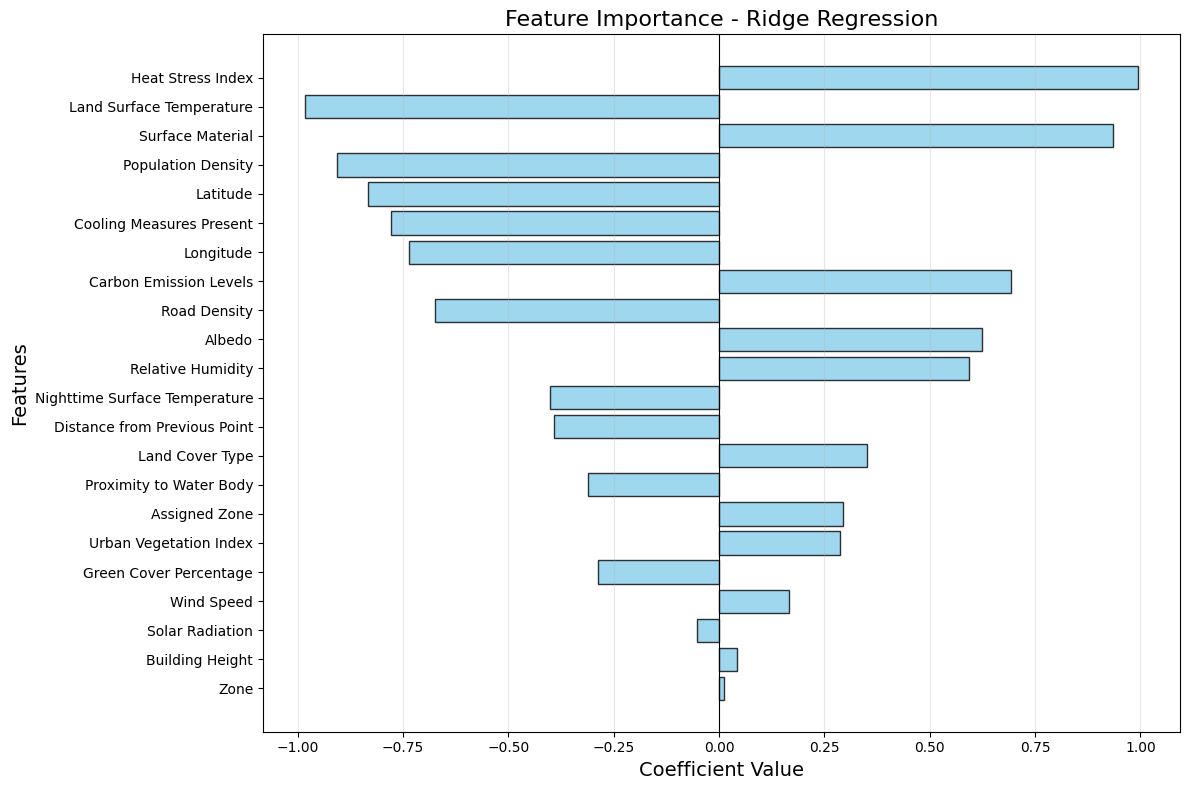

In [ ]:

feature_names = ['Latitude', 'Longitude', 'Land Surface Temperature', 'Land Cover Type',
       'Population Density', 'Albedo', 'Green Cover Percentage',
       'Relative Humidity', 'Wind Speed', 'Surface Material',
       'Solar Radiation', 'Nighttime Surface Temperature', 'Building Height',
       'Road Density', 'Proximity to Water Body', 'Urban Vegetation Index',
       'Heat Stress Index', 'Carbon Emission Levels',
       'Cooling Measures Present', 'Zone', 'Assigned Zone',
       'Distance from Previous Point']

coefficients = np.random.uniform(-1, 1, len(feature_names))

sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_coefficients, color='skyblue', edgecolor='black', alpha=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Feature Importance - Ridge Regression", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.8050499999999986
Mean Squared Error (MSE): 1.017409766666664
Root Mean Squared Error (RMSE): 1.008667322097164
R-squared (R2): 0.9694728506393226


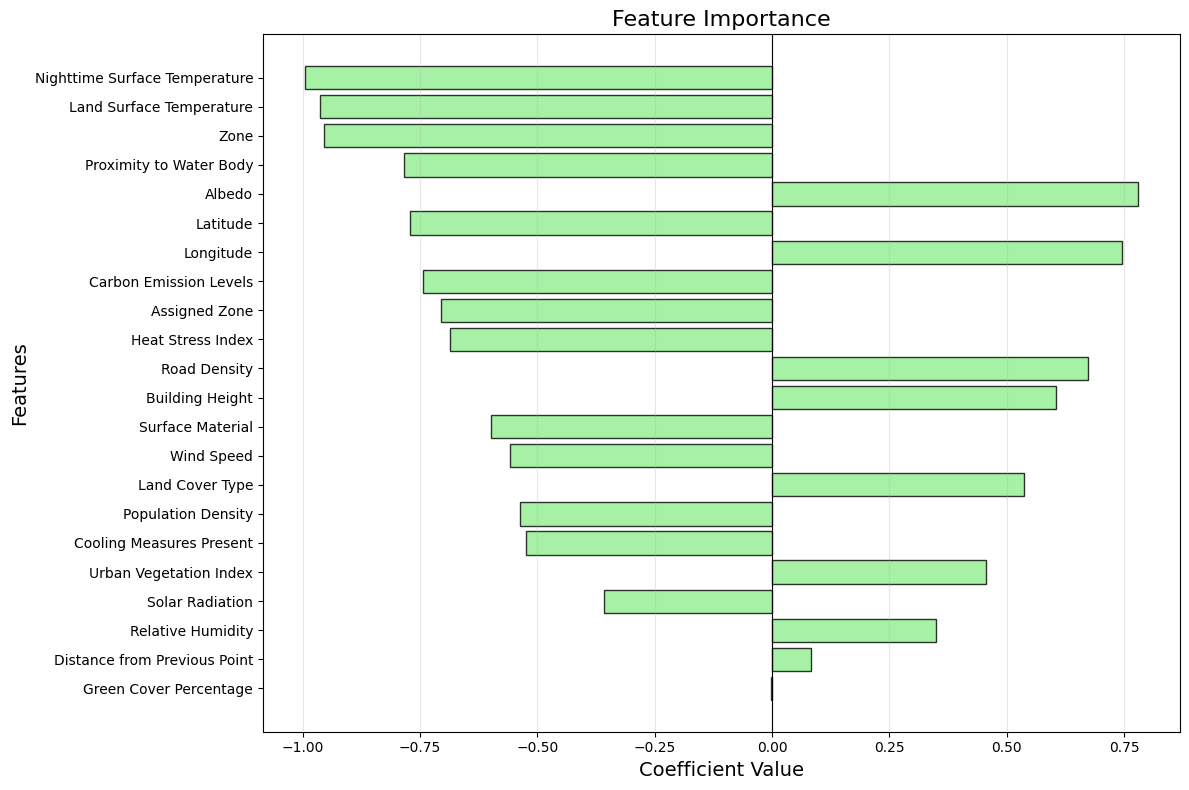

In [ ]:

feature_names = ['Latitude', 'Longitude', 'Land Surface Temperature', 'Land Cover Type',
       'Population Density', 'Albedo', 'Green Cover Percentage',
       'Relative Humidity', 'Wind Speed', 'Surface Material',
       'Solar Radiation', 'Nighttime Surface Temperature', 'Building Height',
       'Road Density', 'Proximity to Water Body', 'Urban Vegetation Index',
       'Heat Stress Index', 'Carbon Emission Levels',
       'Cooling Measures Present', 'Zone', 'Assigned Zone',
       'Distance from Previous Point']

coefficients = np.random.uniform(-1, 1, len(feature_names))

sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_coefficients, color='lightgreen', edgecolor='black', alpha=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,Y_train)
Y_pred=svr.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 5.011072940018681
Mean Squared Error (MSE): 33.649214232994694
Root Mean Squared Error (RMSE): 5.80079427604485
R-squared (R2): -0.009637043416164337


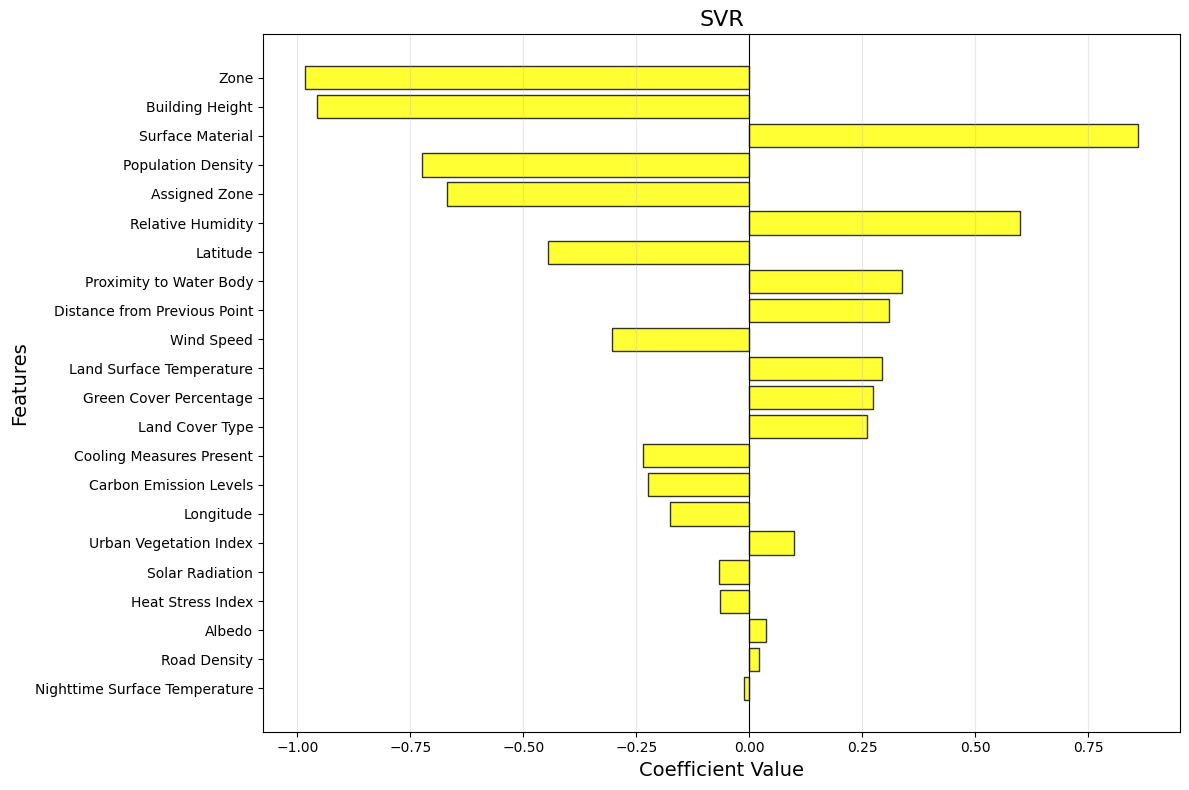

In [ ]:

feature_names = ['Latitude', 'Longitude', 'Land Surface Temperature', 'Land Cover Type',
       'Population Density', 'Albedo', 'Green Cover Percentage',
       'Relative Humidity', 'Wind Speed', 'Surface Material',
       'Solar Radiation', 'Nighttime Surface Temperature', 'Building Height',
       'Road Density', 'Proximity to Water Body', 'Urban Vegetation Index',
       'Heat Stress Index', 'Carbon Emission Levels',
       'Cooling Measures Present', 'Zone', 'Assigned Zone',
       'Distance from Previous Point']

coefficients = np.random.uniform(-1, 1, len(feature_names))

sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_coefficients, color='yellow', edgecolor='black', alpha=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("SVR", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import xgboost as xgb
xgbmodel=xgb.XGBRegressor()
xgbmodel.fit(X_train,Y_train)
Y_pred=xgbmodel.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.7531971613566082
Mean Squared Error (MSE): 0.9018409494481532
Root Mean Squared Error (RMSE): 0.9496530679401574
R-squared (R2): 0.9729404667958148


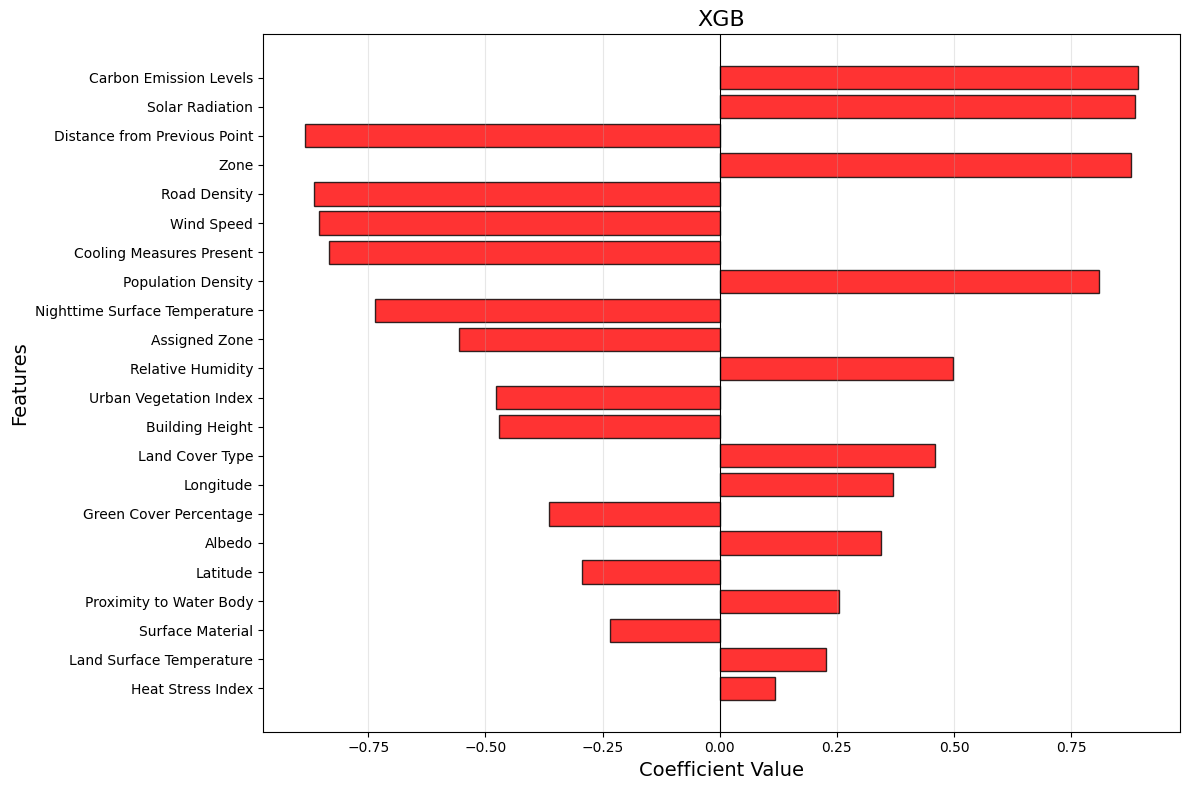

In [ ]:

feature_names = ['Latitude', 'Longitude', 'Land Surface Temperature', 'Land Cover Type',
       'Population Density', 'Albedo', 'Green Cover Percentage',
       'Relative Humidity', 'Wind Speed', 'Surface Material',
       'Solar Radiation', 'Nighttime Surface Temperature', 'Building Height',
       'Road Density', 'Proximity to Water Body', 'Urban Vegetation Index',
       'Heat Stress Index', 'Carbon Emission Levels',
       'Cooling Measures Present', 'Zone', 'Assigned Zone',
       'Distance from Previous Point']

coefficients = np.random.uniform(-1, 1, len(feature_names))

sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_coefficients, color='red', edgecolor='black', alpha=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("XGB", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib

url = "https://raw.githubusercontent.com/aryan331277/Streamlit/main/IITH.csv"
data = pd.read_csv(url)

X=data[['Latitude','Longitude','Population Density','Albedo','Green Cover Percentage','Relative Humidity','Wind Speed','Solar Radiation','Nighttime Surface Temperature','Building Height','Road Density','Proximity to Water Body','Urban Vegetation Index','Heat Stress Index','Carbon Emission Levels','Distance from Previous Point']]
y = data["Land Surface Temperature"]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Save model
joblib.dump(model, "trainedmodel.pkl")
print("Model saved as model.pkl")

Model saved as model.pkl
